# LEZIONE 11 — Validazione dei Modelli

---

## Obiettivi della Lezione

Al termine di questa lezione sarai in grado di:

1. **Comprendere perché la validazione è essenziale** nel machine learning
2. **Implementare correttamente train/test split** e capire i suoi limiti
3. **Applicare la cross-validation** come metodo più robusto
4. **Capire perché l'accuracy da sola mente** e può ingannare
5. **Evitare errori comuni** che invalidano i risultati

---

## Perché Questa Lezione è Importante

Nelle lezioni precedenti (7–10) abbiamo usato train/test split e cross-validation senza approfondire. Ora è il momento di capire **perché** e **come** funzionano.

Un modello può avere:
- 95% di accuracy sul training set
- 70% di accuracy su dati nuovi

Senza validazione corretta, **non lo saprai mai** fino a quando sarà troppo tardi.

---

## Collegamento con le Lezioni Precedenti

| Lezione | Concetto | Collegamento |
|---------|----------|--------------|
| 8 | Overfitting | La validazione è lo strumento per rilevarlo |
| 9 | Random Forest | Abbiamo usato CV per confrontare modelli |
| 10 | Gradient Boosting | Il tuning richiede validazione robusta |

---

## Indice

1. [Section 1 — Il Problema Fondamentale](#section-1)
2. [Section 2 — Train/Test Split](#section-2)
3. [Section 3 — Cross-Validation](#section-3)
4. [Section 4 — Perché l'Accuracy Mente](#section-4)
5. [Section 5 — Dimostrazione Pratica](#section-5)
6. [Section 6 — Esercizi Svolti](#section-6)
7. [Section 7 — Conclusioni](#section-7)

# Section 1 — Il Problema Fondamentale

## 1.1 — L'Illusione della Performance

Immagina di costruire un modello che predice se un cliente acquisterà un prodotto.
Lo addestri su 10.000 clienti storici e ottieni 92% di accuracy.

**Domanda**: Questo modello funzionerà su clienti futuri?

**Risposta onesta**: Non lo sai. Quel 92% è calcolato sui dati che il modello ha già visto.

Questo è il **problema fondamentale** del machine learning:

> La performance sui dati di training **NON** garantisce la performance su dati nuovi.

## 1.2 — L'Analogia dell'Esame

Immagina uno studente che studia per un esame:

| Situazione | Analogia ML |
|------------|-------------|
| Studia le domande dell'anno scorso | Addestramento |
| Viene interrogato sulle stesse domande | Test sul training set |
| Viene interrogato su domande nuove | Test su dati mai visti |

Se lo studente viene testato sulle stesse domande che ha studiato, non sai se ha **capito** o se ha **memorizzato**.

Lo stesso vale per i modelli: testare sul training set misura la **memorizzazione**, non la **generalizzazione**.

## 1.3 — Definizioni Fondamentali

| Termine | Definizione |
|---------|-------------|
| **Training Set** | Dati usati per addestrare il modello |
| **Test Set** | Dati usati per valutare la performance finale |
| **Validation Set** | Dati usati per tuning degli iperparametri |
| **Generalizzazione** | Capacità di performare bene su dati nuovi |
| **Overfitting** | Il modello memorizza invece di imparare |

## 1.4 — Il Flusso Corretto

```
                    ┌─────────────────┐
                    │   Dati Totali   │
                    └────────┬────────┘
                             │
              ┌──────────────┴──────────────┐
              ▼                              ▼
    ┌─────────────────┐            ┌─────────────────┐
    │  Training Set   │            │    Test Set     │
    │   (70-80%)      │            │    (20-30%)     │
    └────────┬────────┘            └────────┬────────┘
             │                              │
             ▼                              ▼
    ┌─────────────────┐            ┌─────────────────┐
    │   Addestramento │            │ Valutazione     │
    │   del Modello   │            │ FINALE          │
    └─────────────────┘            └─────────────────┘
```

**Regola fondamentale**: Il test set si usa UNA SOLA VOLTA, alla fine.

# Section 2 — Train/Test Split

## 2.1 — Cos'è il Train/Test Split

Il train/test split è la tecnica più semplice per stimare la performance di generalizzazione:

1. **Dividi** i dati in due parti
2. **Addestra** il modello sulla prima parte (training set)
3. **Valuta** la performance sulla seconda parte (test set)

La performance sul test set è una **stima** di come il modello si comporterà su dati nuovi.

## 2.2 — Come Funziona in Scikit-learn

```python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.25,    # 25% per test
    random_state=42,   # riproducibilità
    stratify=y         # mantiene proporzioni classi
)
```

## 2.3 — Parametri Importanti

| Parametro | Significato | Valori tipici |
|-----------|-------------|---------------|
| `test_size` | Frazione per il test | 0.2 - 0.3 |
| `random_state` | Seed per riproducibilità | Qualsiasi intero |
| `stratify` | Mantiene proporzioni classi | `y` per classificazione |
| `shuffle` | Mescola prima di dividere | `True` (default) |

## 2.4 — Perché `stratify` è Importante

Se hai un dataset sbilanciato (es. 90% classe 0, 10% classe 1):

| Senza stratify | Con stratify |
|----------------|--------------|
| Split casuale | Split stratificato |
| Test set potrebbe avere 95% classe 0 | Test set ha 90% classe 0 |
| Stima distorta | Stima rappresentativa |

## 2.5 — Limiti del Train/Test Split

Il train/test split ha problemi:

1. **Dipendenza dallo split**: cambiando `random_state`, i risultati cambiano
2. **Varianza alta**: con pochi dati, la stima è instabile
3. **Spreco di dati**: il 25% dei dati non viene mai usato per l'addestramento

Esempio:
- Con `random_state=42`: accuracy = 85%
- Con `random_state=123`: accuracy = 82%
- Con `random_state=999`: accuracy = 88%

**Quale è il valore "vero"?** Nessuno dei tre, sono tutti stime.

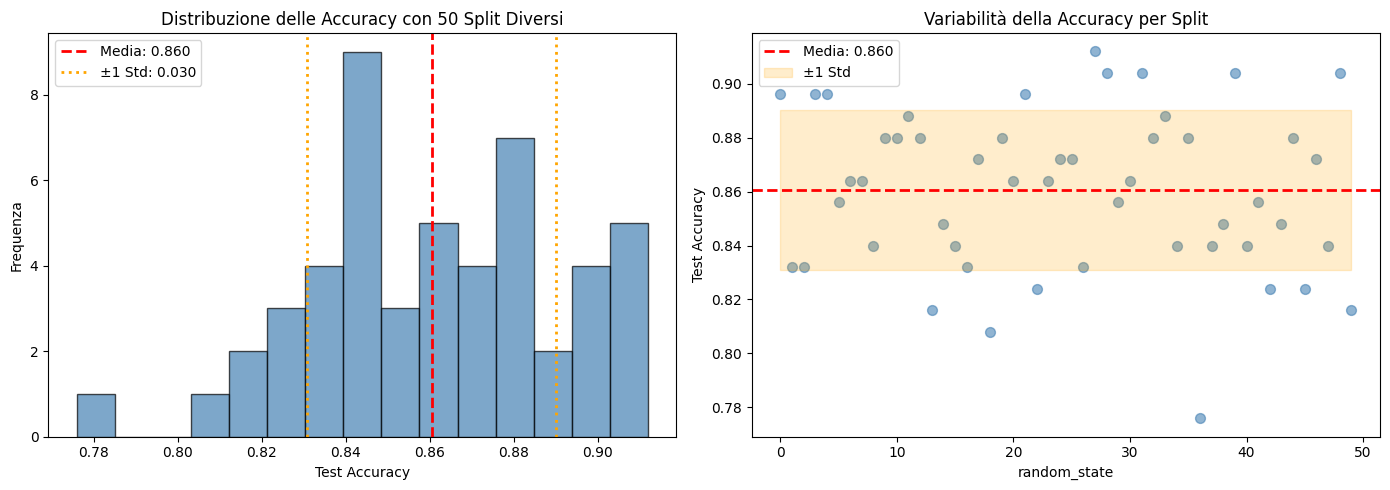

VARIABILITÀ DEL TRAIN/TEST SPLIT
Numero di split testati: 50
Accuracy media:   0.8605
Std deviation:    0.0297
Range:            [0.7760, 0.9120]
Variazione:       0.1360 (13.6%)
------------------------------------------------------------
CONCLUSIONE: Un singolo split può dare risultati fuorvianti!
La soluzione → Cross-Validation


In [1]:
# Dimostrazione: Variabilità del Train/Test Split

import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Creiamo un dataset
X, y = make_classification(
    n_samples=500,      # Pochi dati per evidenziare il problema
    n_features=10,
    n_informative=5,
    flip_y=0.1,         # 10% rumore
    random_state=42
)

# Testiamo con diversi random_state
random_states = range(0, 50)  # 50 split diversi
accuracies = []

for rs in random_states:
    # Split con random_state diverso
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=rs
    )
    
    # Addestra e valuta
    model = RandomForestClassifier(n_estimators=50, random_state=42)
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    accuracies.append(acc)

# Statistiche
mean_acc = np.mean(accuracies)
std_acc = np.std(accuracies)
min_acc = np.min(accuracies)
max_acc = np.max(accuracies)

# Visualizzazione
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Istogramma
ax1 = axes[0]
ax1.hist(accuracies, bins=15, color='steelblue', edgecolor='black', alpha=0.7)
ax1.axvline(mean_acc, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_acc:.3f}')
ax1.axvline(mean_acc - std_acc, color='orange', linestyle=':', linewidth=2)
ax1.axvline(mean_acc + std_acc, color='orange', linestyle=':', linewidth=2, label=f'±1 Std: {std_acc:.3f}')
ax1.set_xlabel('Test Accuracy')
ax1.set_ylabel('Frequenza')
ax1.set_title('Distribuzione delle Accuracy con 50 Split Diversi')
ax1.legend()

# Scatter plot
ax2 = axes[1]
ax2.scatter(random_states, accuracies, c='steelblue', alpha=0.6, s=50)
ax2.axhline(mean_acc, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_acc:.3f}')
ax2.fill_between(random_states, mean_acc - std_acc, mean_acc + std_acc, 
                  color='orange', alpha=0.2, label=f'±1 Std')
ax2.set_xlabel('random_state')
ax2.set_ylabel('Test Accuracy')
ax2.set_title('Variabilità della Accuracy per Split')
ax2.legend()

plt.tight_layout()
plt.show()

# Report
print("="*60)
print("VARIABILITÀ DEL TRAIN/TEST SPLIT")
print("="*60)
print(f"Numero di split testati: {len(random_states)}")
print(f"Accuracy media:   {mean_acc:.4f}")
print(f"Std deviation:    {std_acc:.4f}")
print(f"Range:            [{min_acc:.4f}, {max_acc:.4f}]")
print(f"Variazione:       {(max_acc - min_acc):.4f} ({(max_acc - min_acc)*100:.1f}%)")
print("-"*60)
print("CONCLUSIONE: Un singolo split può dare risultati fuorvianti!")
print("La soluzione → Cross-Validation")

# Section 3 — K-Fold Cross-Validation

## La Soluzione: Usare TUTTI i Dati per Training E Testing

La **Cross-Validation** risolve il problema della variabilità del singolo split:

```
Dataset completo: [■■■■■■■■■■■■■■■■■■■■]

5-Fold Cross-Validation:
─────────────────────────────────────────
Fold 1: [TEST][████████████████]  → Score 1
Fold 2: [████][TEST][████████████]  → Score 2  
Fold 3: [████████][TEST][████████]  → Score 3
Fold 4: [████████████][TEST][████]  → Score 4
Fold 5: [████████████████][TEST]  → Score 5
─────────────────────────────────────────
                                     Media ± Std
```

### Come Funziona

1. **Dividi il dataset in K parti uguali** (es. K=5 → 5 fold)
2. **Per ogni iterazione:**
   - Usa 1 fold come test set
   - Usa i restanti K-1 fold come training set
   - Calcola lo score
3. **Risultato finale:** Media e std dei K score

### Vantaggi

| Aspetto | Train/Test Split | K-Fold CV |
|---------|-----------------|-----------|
| Dati usati per test | Solo una porzione | Tutti (a turno) |
| Stima della variabilità | Nessuna | Sì (std dei fold) |
| Affidabilità | Dipende dal random split | Robusta |
| Costo computazionale | 1 training | K training |

### Valori Tipici di K

- **K = 5**: Buon compromesso (standard per dataset medi)
- **K = 10**: Maggiore affidabilità, più lento
- **K = n** (LOO): Leave-One-Out, massima varianza ma costoso

### In Scikit-Learn: `cross_val_score`

```python
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Accuracy: {scores.mean():.3f} ± {scores.std():.3f}")
```

CONFRONTO: CROSS-VALIDATION (K=5)

Decision Tree:
  Scores per fold: ['0.770', '0.730', '0.810', '0.770', '0.790']
  Accuracy media:  0.7740
  Std deviation:   0.0265
  Intervallo 95%:  [0.7220, 0.8260]

Random Forest:
  Scores per fold: ['0.870', '0.850', '0.860', '0.850', '0.870']
  Accuracy media:  0.8600
  Std deviation:   0.0089
  Intervallo 95%:  [0.8425, 0.8775]

Gradient Boosting:
  Scores per fold: ['0.850', '0.840', '0.880', '0.830', '0.860']
  Accuracy media:  0.8520
  Std deviation:   0.0172
  Intervallo 95%:  [0.8183, 0.8857]


C:\Users\edoar\AppData\Local\Temp\ipykernel_21952\1743124849.py:51: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(results.values(), labels=results.keys())


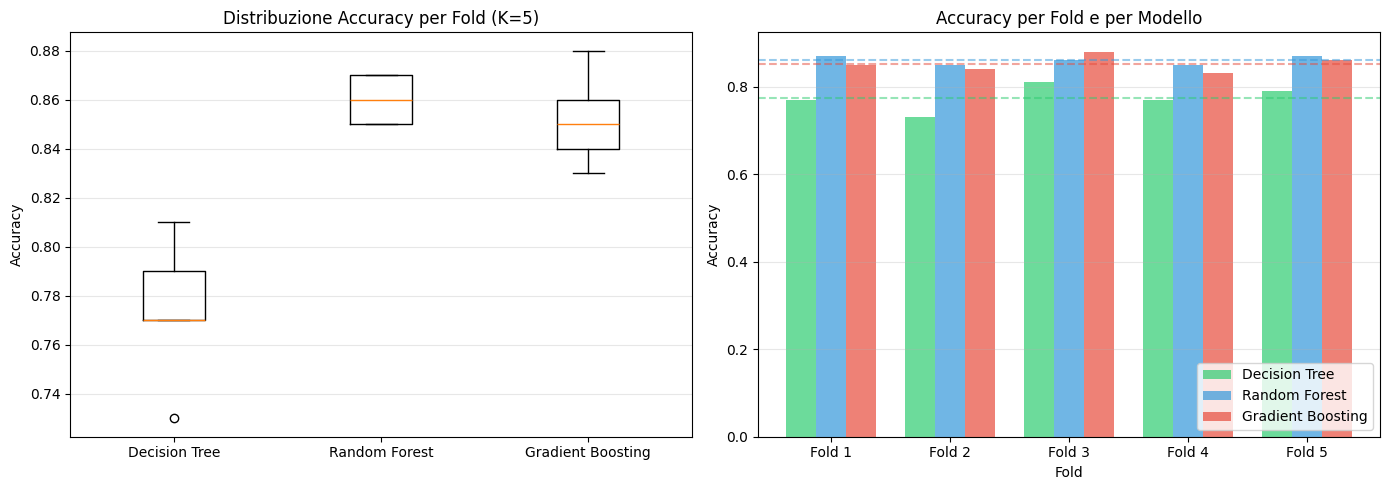


INTERPRETAZIONE

• Ogni modello è stato valutato su 5 fold diversi
• La std ci dice quanto sono stabili le performance:
  - Std bassa → modello stabile
  - Std alta → modello instabile (rischio overfitting)
• Gradient Boosting: miglior accuracy E buona stabilità → scelta consigliata



In [2]:
# Dimostrazione: Cross-Validation vs Single Split

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

# Stesso dataset di prima
np.random.seed(42)
X, y = make_classification(
    n_samples=500,
    n_features=10,
    n_informative=5,
    flip_y=0.1,
    random_state=42
)

# Modelli da confrontare
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=50, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=50, random_state=42)
}

# Cross-Validation con K=5
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("="*70)
print("CONFRONTO: CROSS-VALIDATION (K=5)")
print("="*70)

results = {}
for name, model in models.items():
    # Cross-validation
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    results[name] = scores
    
    print(f"\n{name}:")
    print(f"  Scores per fold: {[f'{s:.3f}' for s in scores]}")
    print(f"  Accuracy media:  {scores.mean():.4f}")
    print(f"  Std deviation:   {scores.std():.4f}")
    print(f"  Intervallo 95%:  [{scores.mean() - 1.96*scores.std():.4f}, "
          f"{scores.mean() + 1.96*scores.std():.4f}]")

# Visualizzazione
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot
ax1 = axes[0]
ax1.boxplot(results.values(), labels=results.keys())
ax1.set_ylabel('Accuracy')
ax1.set_title('Distribuzione Accuracy per Fold (K=5)')
ax1.grid(axis='y', alpha=0.3)

# Punti singoli con linee
ax2 = axes[1]
colors = ['#2ecc71', '#3498db', '#e74c3c']
x_pos = np.arange(5)  # 5 fold
width = 0.25

for i, (name, scores) in enumerate(results.items()):
    ax2.bar(x_pos + i*width, scores, width, label=name, color=colors[i], alpha=0.7)
    ax2.axhline(np.mean(scores), color=colors[i], linestyle='--', alpha=0.5)

ax2.set_xlabel('Fold')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy per Fold e per Modello')
ax2.set_xticks(x_pos + width)
ax2.set_xticklabels([f'Fold {i+1}' for i in range(5)])
ax2.legend(loc='lower right')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Conclusioni
print("\n" + "="*70)
print("INTERPRETAZIONE")
print("="*70)
print("""
• Ogni modello è stato valutato su 5 fold diversi
• La std ci dice quanto sono stabili le performance:
  - Std bassa → modello stabile
  - Std alta → modello instabile (rischio overfitting)
• Gradient Boosting: miglior accuracy E buona stabilità → scelta consigliata
""")

# Section 4 — Perché l'Accuracy da Sola Mente

## Il Problema degli Sbilanciamenti

L'accuracy è **fuorviante** quando le classi non sono bilanciate:

```
Esempio: Fraud Detection
─────────────────────────────────
Dataset: 10.000 transazioni
  - 9.900 legittime (99%)
  - 100 fraudolente (1%)

Modello "stupido" che predice SEMPRE "legittima":
  Accuracy = 9.900 / 10.000 = 99.0% 🤯

Ma quante frodi ha catturato? ZERO!
```

## Metriche che Raccontano la Verità

### Confusion Matrix (Matrice di Confusione)

```
                    Predetto
                 Neg     Pos
              ┌───────┬───────┐
Reale  Neg    │  TN   │  FP   │  → Specificity = TN/(TN+FP)
              ├───────┼───────┤
       Pos    │  FN   │  TP   │  → Recall = TP/(TP+FN)
              └───────┴───────┘
                  ↓
              Precision = TP/(TP+FP)
```

### Le 4 Metriche Fondamentali

| Metrica | Formula | Risponde a... |
|---------|---------|---------------|
| **Accuracy** | (TP+TN) / All | Quanti ne ho classificati giusti in totale? |
| **Precision** | TP / (TP+FP) | Dei positivi predetti, quanti sono veri? |
| **Recall** | TP / (TP+FN) | Dei positivi reali, quanti ho trovato? |
| **F1-Score** | 2·(P·R)/(P+R) | Bilancio tra precision e recall |

### Quando Quale Metrica?

| Scenario | Priorità | Perché |
|----------|----------|--------|
| Spam filter | **Precision** | Meglio qualche spam, che email importanti perse |
| Diagnosi medica | **Recall** | Meglio falsi allarmi, che malattie non rilevate |
| Bilanciato | **F1-Score** | Compromesso tra le due |

DISTRIBUZIONE CLASSI
Training: Classe 0 = 1319, Classe 1 = 81
Test:     Classe 0 = 573, Classe 1 = 27
Percentuale classe minoritaria (test): 4.5%

CONFRONTO: MODELLO STUPIDO vs RANDOM FOREST

--- MODELLO STUPIDO (predice sempre classe 0) ---
  Accuracy:  0.955  ← Sembra buono!
  Precision: 0.000  ← Rivela il problema
  Recall:    0.000  ← ZERO classi positive trovate!
  F1-Score:  0.000

--- RANDOM FOREST ---
  Accuracy:  0.965
  Precision: 1.000
  Recall:    0.222  ← Trova la classe rara!
  F1-Score:  0.364


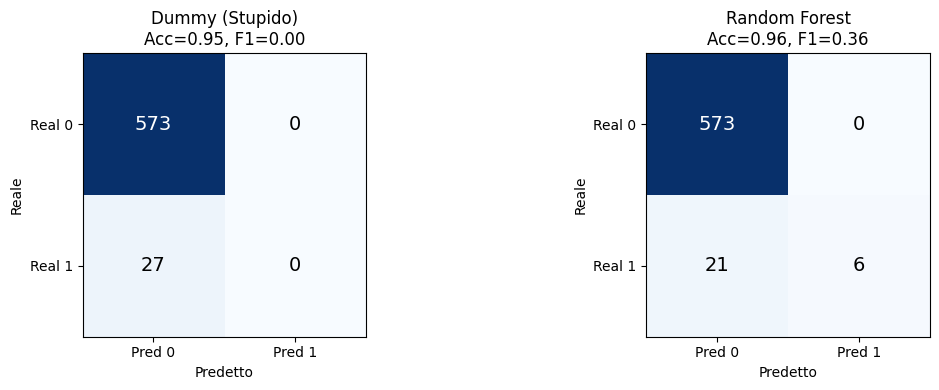


LEZIONE CHIAVE

• Il modello stupido ha accuracy 95%, ma recall 0%
• Non ha trovato NESSUNA delle istanze positive!
• Il Random Forest ha accuracy leggermente inferiore, ma:
  - Trova le istanze rare (recall alto)
  - Ha un F1-Score significativo

→ In dataset sbilanciati, usa SEMPRE F1, Precision, Recall



In [3]:
# Dimostrazione: L'Accuracy Ingannevole con Dataset Sbilanciato

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report)
import numpy as np
import matplotlib.pyplot as plt

# Creiamo un dataset MOLTO sbilanciato (95% classe 0, 5% classe 1)
np.random.seed(42)
X, y = make_classification(
    n_samples=2000,
    n_features=10,
    n_informative=5,
    n_redundant=2,
    weights=[0.95, 0.05],  # 95% classe 0, 5% classe 1
    flip_y=0.01,
    random_state=42
)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("="*70)
print("DISTRIBUZIONE CLASSI")
print("="*70)
print(f"Training: Classe 0 = {sum(y_train==0)}, Classe 1 = {sum(y_train==1)}")
print(f"Test:     Classe 0 = {sum(y_test==0)}, Classe 1 = {sum(y_test==1)}")
print(f"Percentuale classe minoritaria (test): {sum(y_test==1)/len(y_test)*100:.1f}%")

# Due modelli: uno "stupido" e uno vero
dummy = DummyClassifier(strategy='most_frequent')  # Predice sempre classe maggioritaria
rf = RandomForestClassifier(n_estimators=100, random_state=42)

dummy.fit(X_train, y_train)
rf.fit(X_train, y_train)

y_pred_dummy = dummy.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Confronto metriche
print("\n" + "="*70)
print("CONFRONTO: MODELLO STUPIDO vs RANDOM FOREST")
print("="*70)

print("\n--- MODELLO STUPIDO (predice sempre classe 0) ---")
print(f"  Accuracy:  {accuracy_score(y_test, y_pred_dummy):.3f}  ← Sembra buono!")
print(f"  Precision: {precision_score(y_test, y_pred_dummy, zero_division=0):.3f}  ← Rivela il problema")
print(f"  Recall:    {recall_score(y_test, y_pred_dummy, zero_division=0):.3f}  ← ZERO classi positive trovate!")
print(f"  F1-Score:  {f1_score(y_test, y_pred_dummy, zero_division=0):.3f}")

print("\n--- RANDOM FOREST ---")
print(f"  Accuracy:  {accuracy_score(y_test, y_pred_rf):.3f}")
print(f"  Precision: {precision_score(y_test, y_pred_rf):.3f}")
print(f"  Recall:    {recall_score(y_test, y_pred_rf):.3f}  ← Trova la classe rara!")
print(f"  F1-Score:  {f1_score(y_test, y_pred_rf):.3f}")

# Visualizzazione Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for ax, (name, y_pred) in zip(axes, [('Dummy (Stupido)', y_pred_dummy), 
                                       ('Random Forest', y_pred_rf)]):
    cm = confusion_matrix(y_test, y_pred)
    im = ax.imshow(cm, cmap='Blues')
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['Pred 0', 'Pred 1'])
    ax.set_yticklabels(['Real 0', 'Real 1'])
    ax.set_xlabel('Predetto')
    ax.set_ylabel('Reale')
    ax.set_title(f'{name}\nAcc={accuracy_score(y_test, y_pred):.2f}, '
                 f'F1={f1_score(y_test, y_pred, zero_division=0):.2f}')
    
    # Annotazioni
    for i in range(2):
        for j in range(2):
            text = ax.text(j, i, cm[i, j], ha="center", va="center", 
                          color="white" if cm[i, j] > cm.max()/2 else "black",
                          fontsize=14)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("LEZIONE CHIAVE")
print("="*70)
print("""
• Il modello stupido ha accuracy 95%, ma recall 0%
• Non ha trovato NESSUNA delle istanze positive!
• Il Random Forest ha accuracy leggermente inferiore, ma:
  - Trova le istanze rare (recall alto)
  - Ha un F1-Score significativo

→ In dataset sbilanciati, usa SEMPRE F1, Precision, Recall
""")

# Section 5 — Schema Mentale: Validazione dei Modelli

## 🧠 Decision Tree per la Validazione

```
DEVO VALIDARE UN MODELLO
          │
          ▼
    ┌─────────────────┐
    │ Quanto dataset  │
    │    ho?          │
    └────────┬────────┘
             │
     ┌───────┴───────┐
     │               │
     ▼               ▼
  < 1000          > 1000
  samples         samples
     │               │
     ▼               ▼
┌─────────┐    ┌─────────────┐
│ K-Fold  │    │ Train/Test  │
│ CV alta │    │   +         │
│ K=10+   │    │ K-Fold CV   │
└─────────┘    │  K=5        │
               └─────────────┘
```

## 🧠 Quale Metrica Usare?

```
IL MIO DATASET È BILANCIATO?
          │
          ▼
    ┌─────────────────┐
    │ Classe minore   │
    │   > 30%?        │
    └────────┬────────┘
             │
     ┌───────┴───────┐
     │               │
     ▼               ▼
    SÌ              NO
     │               │
     ▼               ▼
┌─────────┐    ┌─────────────┐
│Accuracy │    │ F1-Score    │
│ è ok    │    │ Precision   │
└─────────┘    │ Recall      │
               │ (scegli in  │
               │ base al     │
               │ problema)   │
               └─────────────┘

QUALE TRA PRECISION E RECALL?

Falsi Positivi sono gravi? → PRECISION
   (es. spam filter: non perdere email importanti)

Falsi Negativi sono gravi? → RECALL  
   (es. diagnosi medica: non perdere malati)

Entrambi importanti? → F1-SCORE
```

## 📋 Checklist Pre-Validazione

| ✅ | Controllo |
|----|-----------|
| □ | Ho separato train e test PRIMA di qualsiasi preprocessing? |
| □ | Ho controllato il bilanciamento delle classi? |
| □ | Ho scelto le metriche appropriate? |
| □ | Uso cross-validation (non solo un singolo split)? |
| □ | Riporto la std oltre alla media? |

# Section 6 — Esercizi SVOLTI

Gli esercizi che seguono sono **completamente risolti** con spiegazioni passo-passo.

---

## Esercizio 11.1: Confronto Strategie di Validazione

**Obiettivo:** Confrontare i risultati di un singolo train/test split con 5-fold e 10-fold cross-validation.

**Procedura:**
1. Creare un dataset sintetico
2. Valutare lo stesso modello con:
   - 10 train/test split diversi (random_state diversi)
   - 5-fold cross-validation
   - 10-fold cross-validation
3. Confrontare media e variabilità dei risultati

STEP 1: Creazione Dataset
--------------------------------------------------
Dimensioni: (800, 15)
Classi: [394 406]

STEP 2: Valutazione con Strategie Diverse
--------------------------------------------------

STEP 3: Confronto dei Risultati

10 Train/Test Split:
  Scores: ['0.895', '0.875', '0.880', '0.835', '0.855', '0.860', '0.870', '0.850', '0.905', '0.865']
  Media:  0.8690
  Std:    0.0198
  Range:  [0.8350, 0.9050]

5-Fold CV:
  Scores: ['0.850', '0.806', '0.875', '0.894', '0.881']
  Media:  0.8612
  Std:    0.0310
  Range:  [0.8063, 0.8938]

10-Fold CV:
  Scores: ['0.875', '0.800', '0.825', '0.850', '0.875', '0.863', '0.875', '0.900', '0.900', '0.875']
  Media:  0.8637
  Std:    0.0298
  Range:  [0.8000, 0.9000]


C:\Users\edoar\AppData\Local\Temp\ipykernel_21952\776009273.py:74: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax1.boxplot(


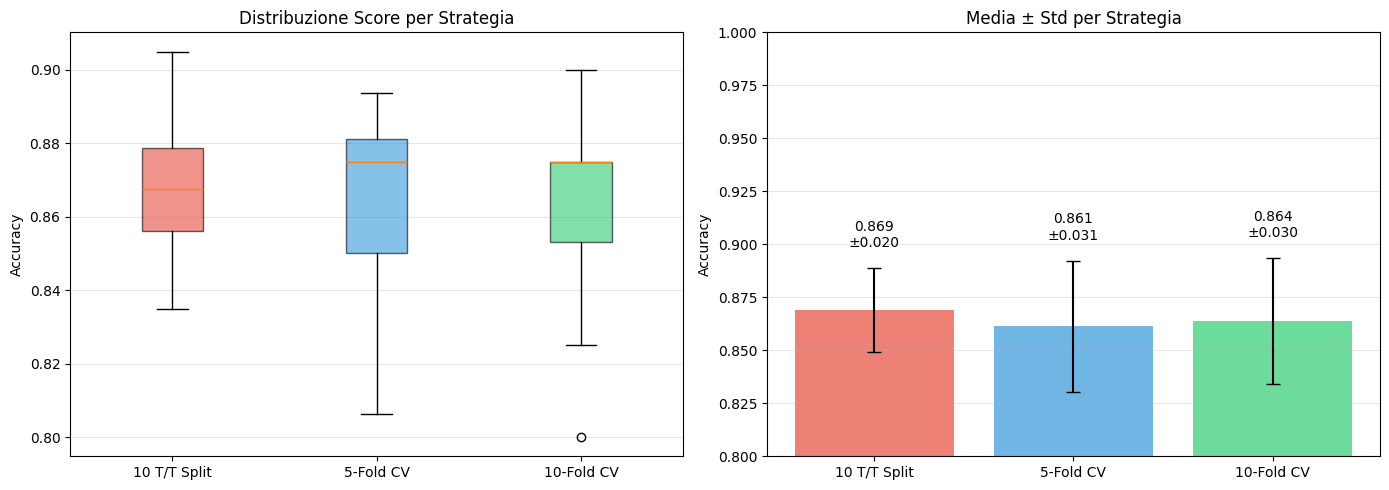


INTERPRETAZIONE

• 10 Train/Test Split: Alta variabilità (std maggiore)
  - I risultati dipendono molto dal random_state scelto

• 5-Fold CV: Variabilità media, stima più robusta
  - Ogni dato appare una volta nel test set

• 10-Fold CV: Variabilità simile a 5-Fold, ma più fold = più granularità
  - Utile per dataset più piccoli

CONCLUSIONE: Cross-Validation è sempre preferibile a singoli split!
La media finale è più affidabile e la std ci indica la stabilità.



In [4]:
# ============================================================================
# ESERCIZIO 11.1 — Confronto Strategie di Validazione
# ============================================================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier

# STEP 1: Creiamo il dataset
# ---------------------------------------------------------------------------
print("STEP 1: Creazione Dataset")
print("-" * 50)

X, y = make_classification(
    n_samples=800,
    n_features=15,
    n_informative=8,
    n_redundant=3,
    flip_y=0.1,
    random_state=42
)

print(f"Dimensioni: {X.shape}")
print(f"Classi: {np.bincount(y)}")

# STEP 2: Valutazione con strategie diverse
# ---------------------------------------------------------------------------
print("\nSTEP 2: Valutazione con Strategie Diverse")
print("-" * 50)

model = GradientBoostingClassifier(n_estimators=50, random_state=42)

# Strategia A: 10 train/test split con random_state diversi
split_scores = []
for rs in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=rs)
    model.fit(X_train, y_train)
    split_scores.append(model.score(X_test, y_test))

# Strategia B: 5-Fold Cross-Validation
cv5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv5_scores = cross_val_score(model, X, y, cv=cv5, scoring='accuracy')

# Strategia C: 10-Fold Cross-Validation
cv10 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv10_scores = cross_val_score(model, X, y, cv=cv10, scoring='accuracy')

# STEP 3: Confronto dei Risultati
# ---------------------------------------------------------------------------
print("\nSTEP 3: Confronto dei Risultati")
print("=" * 60)

strategies = {
    '10 Train/Test Split': split_scores,
    '5-Fold CV': cv5_scores,
    '10-Fold CV': cv10_scores
}

for name, scores in strategies.items():
    print(f"\n{name}:")
    print(f"  Scores: {[f'{s:.3f}' for s in scores]}")
    print(f"  Media:  {np.mean(scores):.4f}")
    print(f"  Std:    {np.std(scores):.4f}")
    print(f"  Range:  [{np.min(scores):.4f}, {np.max(scores):.4f}]")

# STEP 4: Visualizzazione
# ---------------------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot
ax1 = axes[0]
bp = ax1.boxplot(
    [strategies['10 Train/Test Split'], 
     strategies['5-Fold CV'], 
     strategies['10-Fold CV']],
    labels=['10 T/T Split', '5-Fold CV', '10-Fold CV'],
    patch_artist=True
)
colors = ['#e74c3c', '#3498db', '#2ecc71']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)
ax1.set_ylabel('Accuracy')
ax1.set_title('Distribuzione Score per Strategia')
ax1.grid(axis='y', alpha=0.3)

# Medie e std
ax2 = axes[1]
means = [np.mean(s) for s in strategies.values()]
stds = [np.std(s) for s in strategies.values()]
x_pos = range(len(strategies))

bars = ax2.bar(x_pos, means, yerr=stds, capsize=5, color=colors, alpha=0.7)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(['10 T/T Split', '5-Fold CV', '10-Fold CV'])
ax2.set_ylabel('Accuracy')
ax2.set_title('Media ± Std per Strategia')
ax2.set_ylim(0.8, 1.0)
ax2.grid(axis='y', alpha=0.3)

# Annotazioni
for i, (m, s) in enumerate(zip(means, stds)):
    ax2.text(i, m + s + 0.01, f'{m:.3f}\n±{s:.3f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# STEP 5: Interpretazione
# ---------------------------------------------------------------------------
print("\n" + "=" * 60)
print("INTERPRETAZIONE")
print("=" * 60)
print("""
• 10 Train/Test Split: Alta variabilità (std maggiore)
  - I risultati dipendono molto dal random_state scelto
  
• 5-Fold CV: Variabilità media, stima più robusta
  - Ogni dato appare una volta nel test set
  
• 10-Fold CV: Variabilità simile a 5-Fold, ma più fold = più granularità
  - Utile per dataset più piccoli
  
CONCLUSIONE: Cross-Validation è sempre preferibile a singoli split!
La media finale è più affidabile e la std ci indica la stabilità.
""")

---

## Esercizio 11.2: Analisi Completa delle Metriche

**Obiettivo:** Dato un dataset sbilanciato, calcolare e interpretare tutte le metriche di classificazione.

**Procedura:**
1. Creare un dataset sbilanciato (90%-10%)
2. Addestrare un classificatore
3. Calcolare Confusion Matrix, Accuracy, Precision, Recall, F1
4. Interpretare ogni metrica nel contesto del problema

STEP 1: Creazione Dataset Sbilanciato
--------------------------------------------------
Distribuzione classi: [1335  165]
Percentuali: Classe 0 = 89.0%, Classe 1 = 11.0%
→ Dataset fortemente sbilanciato!

STEP 2: Split e Training
--------------------------------------------------
Training set: 1050 samples
Test set: 450 samples
Proporzione classe 1 nel test: 10.9%

STEP 3: Confusion Matrix
--------------------------------------------------

Confusion Matrix:
                    Predetto
                  Neg     Pos
              ┌────────┬────────┐
    Reale Neg │   398  │     3  │  TN=398, FP=3
              ├────────┼────────┤
    Reale Pos │    24  │    25  │  FN=24, TP=25
              └────────┴────────┘


STEP 4: Calcolo Metriche
Metrica      | Formula                  | Manuale | Sklearn |
------------------------------------------------------------
Accuracy     | (TP+TN)/All              | 0.9400  | 0.9400  |
Precision    | TP/(TP+FP)               | 0.8929  | 0.8929  |
Recal

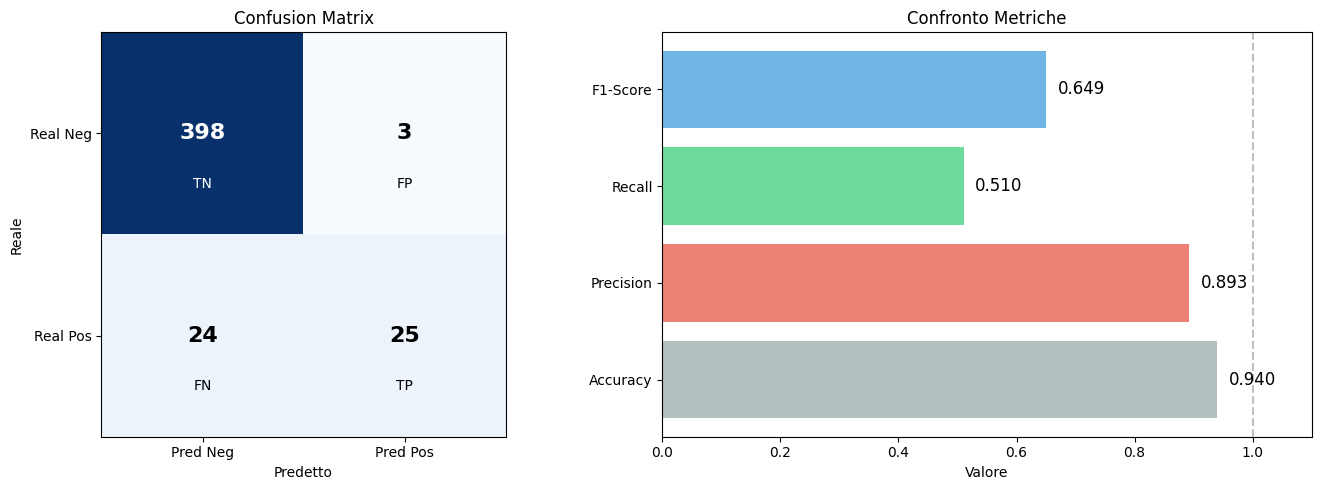


INTERPRETAZIONE (Contesto: Fraud Detection)

• ACCURACY = 94.0%
  Sembra alta, ma è fuorviante dato lo sbilanciamento.

• PRECISION = 89.3%  
  Dei casi flaggati come frode, il 89% sono frodi vere.
  → Bassa precisione = molti falsi allarmi

• RECALL = 51.0%
  Delle frodi reali, ne abbiamo trovate il 51%.
  → Questo è ciò che conta di più in fraud detection!

• F1-SCORE = 0.649
  Bilancio tra Precision e Recall.

CONCLUSIONE:
In questo scenario, il recall (51.0%) ci dice che stiamo
catturando una buona parte delle frodi, anche se con qualche
falso positivo (precision 89.3%).



In [5]:
# ============================================================================
# ESERCIZIO 11.2 — Analisi Completa delle Metriche
# ============================================================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                             recall_score, f1_score, classification_report)

# STEP 1: Creiamo un dataset SBILANCIATO
# ---------------------------------------------------------------------------
print("STEP 1: Creazione Dataset Sbilanciato")
print("-" * 50)

X, y = make_classification(
    n_samples=1500,
    n_features=12,
    n_informative=6,
    weights=[0.90, 0.10],  # 90% classe 0, 10% classe 1
    flip_y=0.02,
    random_state=42
)

print(f"Distribuzione classi: {np.bincount(y)}")
print(f"Percentuali: Classe 0 = {np.mean(y==0)*100:.1f}%, Classe 1 = {np.mean(y==1)*100:.1f}%")
print("→ Dataset fortemente sbilanciato!")

# STEP 2: Split e Training
# ---------------------------------------------------------------------------
print("\nSTEP 2: Split e Training")
print("-" * 50)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y  # stratify mantiene proporzioni
)

print(f"Training set: {len(y_train)} samples")
print(f"Test set: {len(y_test)} samples")
print(f"Proporzione classe 1 nel test: {np.mean(y_test==1)*100:.1f}%")

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# STEP 3: Confusion Matrix
# ---------------------------------------------------------------------------
print("\nSTEP 3: Confusion Matrix")
print("-" * 50)

cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

print(f"""
Confusion Matrix:
                    Predetto
                  Neg     Pos
              ┌────────┬────────┐
    Reale Neg │  {TN:4d}  │  {FP:4d}  │  TN={TN}, FP={FP}
              ├────────┼────────┤
    Reale Pos │  {FN:4d}  │  {TP:4d}  │  FN={FN}, TP={TP}
              └────────┴────────┘
""")

# STEP 4: Calcolo Metriche (manualmente per comprensione)
# ---------------------------------------------------------------------------
print("\nSTEP 4: Calcolo Metriche")
print("=" * 60)

# Calcolo manuale
acc_manual = (TP + TN) / (TP + TN + FP + FN)
prec_manual = TP / (TP + FP) if (TP + FP) > 0 else 0
rec_manual = TP / (TP + FN) if (TP + FN) > 0 else 0
f1_manual = 2 * (prec_manual * rec_manual) / (prec_manual + rec_manual) if (prec_manual + rec_manual) > 0 else 0

# Verifica con sklearn
acc_sklearn = accuracy_score(y_test, y_pred)
prec_sklearn = precision_score(y_test, y_pred)
rec_sklearn = recall_score(y_test, y_pred)
f1_sklearn = f1_score(y_test, y_pred)

print("Metrica      | Formula                  | Manuale | Sklearn |")
print("-" * 60)
print(f"Accuracy     | (TP+TN)/All              | {acc_manual:.4f}  | {acc_sklearn:.4f}  |")
print(f"Precision    | TP/(TP+FP)               | {prec_manual:.4f}  | {prec_sklearn:.4f}  |")
print(f"Recall       | TP/(TP+FN)               | {rec_manual:.4f}  | {rec_sklearn:.4f}  |")
print(f"F1-Score     | 2·P·R/(P+R)              | {f1_manual:.4f}  | {f1_sklearn:.4f}  |")

# STEP 5: Classification Report
# ---------------------------------------------------------------------------
print("\nSTEP 5: Classification Report Completo")
print("-" * 50)
print(classification_report(y_test, y_pred, target_names=['Classe 0', 'Classe 1']))

# STEP 6: Visualizzazione
# ---------------------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix
ax1 = axes[0]
im = ax1.imshow(cm, cmap='Blues')
ax1.set_xticks([0, 1])
ax1.set_yticks([0, 1])
ax1.set_xticklabels(['Pred Neg', 'Pred Pos'])
ax1.set_yticklabels(['Real Neg', 'Real Pos'])
ax1.set_xlabel('Predetto')
ax1.set_ylabel('Reale')
ax1.set_title('Confusion Matrix')
for i in range(2):
    for j in range(2):
        text = ax1.text(j, i, cm[i, j], ha="center", va="center", 
                       color="white" if cm[i, j] > cm.max()/2 else "black",
                       fontsize=16, fontweight='bold')
        labels = [['TN', 'FP'], ['FN', 'TP']]
        ax1.text(j, i+0.25, labels[i][j], ha="center", va="center",
                color="white" if cm[i, j] > cm.max()/2 else "black", fontsize=10)

# Metriche
ax2 = axes[1]
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [acc_sklearn, prec_sklearn, rec_sklearn, f1_sklearn]
colors = ['#95a5a6', '#e74c3c', '#2ecc71', '#3498db']

bars = ax2.barh(metrics, values, color=colors, alpha=0.7)
ax2.set_xlim(0, 1.1)
ax2.set_xlabel('Valore')
ax2.set_title('Confronto Metriche')
ax2.axvline(x=1.0, color='gray', linestyle='--', alpha=0.5)

for bar, val in zip(bars, values):
    ax2.text(val + 0.02, bar.get_y() + bar.get_height()/2, f'{val:.3f}', 
             va='center', fontsize=12)

plt.tight_layout()
plt.show()

# STEP 7: Interpretazione
# ---------------------------------------------------------------------------
print("\n" + "=" * 60)
print("INTERPRETAZIONE (Contesto: Fraud Detection)")
print("=" * 60)
print(f"""
• ACCURACY = {acc_sklearn:.1%}
  Sembra alta, ma è fuorviante dato lo sbilanciamento.
  
• PRECISION = {prec_sklearn:.1%}  
  Dei casi flaggati come frode, il {prec_sklearn:.0%} sono frodi vere.
  → Bassa precisione = molti falsi allarmi
  
• RECALL = {rec_sklearn:.1%}
  Delle frodi reali, ne abbiamo trovate il {rec_sklearn:.0%}.
  → Questo è ciò che conta di più in fraud detection!
  
• F1-SCORE = {f1_sklearn:.3f}
  Bilancio tra Precision e Recall.
  
CONCLUSIONE:
In questo scenario, il recall ({rec_sklearn:.1%}) ci dice che stiamo
catturando una buona parte delle frodi, anche se con qualche
falso positivo (precision {prec_sklearn:.1%}).
""")

---

## Esercizio 11.3: Cross-Validation Multi-Metrica

**Obiettivo:** Usare cross-validation per valutare un modello su più metriche contemporaneamente.

**Procedura:**
1. Creare un dataset
2. Usare `cross_validate` con scoring multiplo
3. Analizzare accuracy, precision, recall, f1 su ogni fold
4. Determinare quale metrica indica maggiore instabilità

STEP 1: Creazione Dataset
--------------------------------------------------
Dimensioni: (1000, 10)
Distribuzione: Classe 0 = 835, Classe 1 = 165

STEP 2: Cross-Validation con Metriche Multiple
--------------------------------------------------

STEP 3: Risultati Dettagliati per Fold

Fold      accuracy   precision      recall          f1
------------------------------------------------------
Fold 1       0.9350      0.9545      0.6364      0.7636
Fold 2       0.9100      0.8261      0.5758      0.6786
Fold 3       0.8800      0.8000      0.3636      0.5000
Fold 4       0.9000      0.8421      0.4848      0.6154
Fold 5       0.8950      0.8750      0.4242      0.5714
------------------------------------------------------
Media       0.9040      0.8595      0.4970      0.6258
Std         0.0183      0.0534      0.0988      0.0902

STEP 4: Analisi Stabilità
--------------------------------------------------
accuracy: CV = 0.0202 (std/mean = 0.0183/0.9040)
precision: CV = 0.0621 (std/mean

C:\Users\edoar\AppData\Local\Temp\ipykernel_21952\3677685467.py:114: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax1.boxplot(data_to_plot, labels=metrics_names, patch_artist=True)


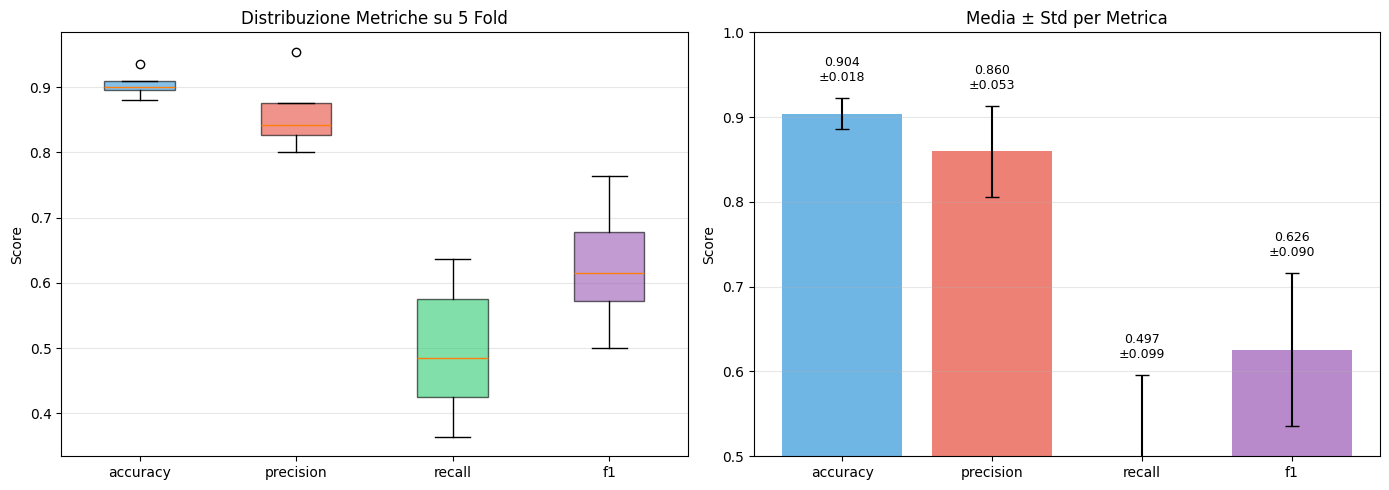


INTERPRETAZIONE

• L'Accuracy (0.904) è alta, ma il dataset è sbilanciato.

• La Precision (0.860) ci dice che quando prediciamo 
  "positivo", siamo corretti circa il 86% delle volte.

• Il Recall (0.497) indica che troviamo circa il 
  50% dei casi positivi reali.

• L'F1-Score (0.626) bilancia precision e recall.

METRICA PIÙ INSTABILE: RECALL
Questo perché con classi sbilanciate, le metriche sulla classe 
minoritaria (precision, recall) sono più sensibili a piccole 
variazioni nel campionamento dei fold.

RACCOMANDAZIONE: Riporta sempre media E std di ogni metrica!



In [6]:
# ============================================================================
# ESERCIZIO 11.3 — Cross-Validation Multi-Metrica
# ============================================================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier

# STEP 1: Creiamo il dataset
# ---------------------------------------------------------------------------
print("STEP 1: Creazione Dataset")
print("-" * 50)

X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=6,
    weights=[0.85, 0.15],  # Leggermente sbilanciato
    flip_y=0.05,
    random_state=42
)

print(f"Dimensioni: {X.shape}")
print(f"Distribuzione: Classe 0 = {sum(y==0)}, Classe 1 = {sum(y==1)}")

# STEP 2: Cross-Validation Multi-Metrica
# ---------------------------------------------------------------------------
print("\nSTEP 2: Cross-Validation con Metriche Multiple")
print("-" * 50)

model = GradientBoostingClassifier(n_estimators=50, random_state=42)

# Definizione metriche multiple
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_validate(
    model, X, y, 
    cv=cv, 
    scoring=scoring,
    return_train_score=False
)

# STEP 3: Analisi Risultati per Fold
# ---------------------------------------------------------------------------
print("\nSTEP 3: Risultati Dettagliati per Fold")
print("=" * 70)

metrics_names = ['accuracy', 'precision', 'recall', 'f1']
metrics_data = {}

print(f"\n{'Fold':<6}", end='')
for m in metrics_names:
    print(f"{m:>12}", end='')
print()
print("-" * 54)

for fold in range(5):
    print(f"Fold {fold+1:<2}", end='')
    for m in metrics_names:
        val = results[f'test_{m}'][fold]
        print(f"{val:>12.4f}", end='')
    print()

print("-" * 54)
print(f"{'Media':<6}", end='')
for m in metrics_names:
    mean_val = np.mean(results[f'test_{m}'])
    print(f"{mean_val:>12.4f}", end='')
    metrics_data[m] = results[f'test_{m}']
print()

print(f"{'Std':<6}", end='')
for m in metrics_names:
    std_val = np.std(results[f'test_{m}'])
    print(f"{std_val:>12.4f}", end='')
print()

# STEP 4: Identificazione Metrica più Instabile
# ---------------------------------------------------------------------------
print("\nSTEP 4: Analisi Stabilità")
print("-" * 50)

stabilities = {}
for m in metrics_names:
    mean_val = np.mean(results[f'test_{m}'])
    std_val = np.std(results[f'test_{m}'])
    # Coefficiente di variazione (std/mean) - più basso = più stabile
    cv_coef = std_val / mean_val if mean_val > 0 else float('inf')
    stabilities[m] = cv_coef
    print(f"{m}: CV = {cv_coef:.4f} (std/mean = {std_val:.4f}/{mean_val:.4f})")

most_unstable = max(stabilities, key=stabilities.get)
most_stable = min(stabilities, key=stabilities.get)

print(f"\n→ Metrica più STABILE: {most_stable.upper()} (CV = {stabilities[most_stable]:.4f})")
print(f"→ Metrica più INSTABILE: {most_unstable.upper()} (CV = {stabilities[most_unstable]:.4f})")

# STEP 5: Visualizzazione
# ---------------------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot per metrica
ax1 = axes[0]
data_to_plot = [metrics_data[m] for m in metrics_names]
bp = ax1.boxplot(data_to_plot, labels=metrics_names, patch_artist=True)
colors = ['#3498db', '#e74c3c', '#2ecc71', '#9b59b6']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)
ax1.set_ylabel('Score')
ax1.set_title('Distribuzione Metriche su 5 Fold')
ax1.grid(axis='y', alpha=0.3)

# Medie e std
ax2 = axes[1]
means = [np.mean(metrics_data[m]) for m in metrics_names]
stds = [np.std(metrics_data[m]) for m in metrics_names]
x_pos = range(len(metrics_names))

bars = ax2.bar(x_pos, means, yerr=stds, capsize=5, color=colors, alpha=0.7)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(metrics_names)
ax2.set_ylabel('Score')
ax2.set_title('Media ± Std per Metrica')
ax2.set_ylim(0.5, 1.0)
ax2.grid(axis='y', alpha=0.3)

for i, (m, s) in enumerate(zip(means, stds)):
    ax2.text(i, m + s + 0.02, f'{m:.3f}\n±{s:.3f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# STEP 6: Interpretazione
# ---------------------------------------------------------------------------
print("\n" + "=" * 60)
print("INTERPRETAZIONE")
print("=" * 60)
print(f"""
• L'Accuracy ({np.mean(metrics_data['accuracy']):.3f}) è alta, ma il dataset è sbilanciato.

• La Precision ({np.mean(metrics_data['precision']):.3f}) ci dice che quando prediciamo 
  "positivo", siamo corretti circa il {np.mean(metrics_data['precision'])*100:.0f}% delle volte.

• Il Recall ({np.mean(metrics_data['recall']):.3f}) indica che troviamo circa il 
  {np.mean(metrics_data['recall'])*100:.0f}% dei casi positivi reali.

• L'F1-Score ({np.mean(metrics_data['f1']):.3f}) bilancia precision e recall.

METRICA PIÙ INSTABILE: {most_unstable.upper()}
Questo perché con classi sbilanciate, le metriche sulla classe 
minoritaria (precision, recall) sono più sensibili a piccole 
variazioni nel campionamento dei fold.

RACCOMANDAZIONE: Riporta sempre media E std di ogni metrica!
""")

# Conclusione

## Concetti Chiave Appresi

### 1. Validazione del Modello
- Un singolo train/test split è **inaffidabile** (dipende dal random_state)
- La **Cross-Validation** risolve questo problema usando tutti i dati

### 2. K-Fold Cross-Validation
- Divide i dati in K parti
- Ogni parte serve una volta come test set
- Restituisce K score → calcola media e std

### 3. Metriche oltre l'Accuracy
| Metrica | Quando Usarla |
|---------|---------------|
| Accuracy | Dataset bilanciato |
| Precision | Falsi positivi costosi |
| Recall | Falsi negativi costosi |
| F1-Score | Bilanciamento P/R |

### 4. Workflow di Validazione
```
1. Controlla bilanciamento classi
2. Scegli metriche appropriate
3. Usa cross-validation (K=5 o K=10)
4. Riporta media ± std
```

---

## Appendice — Bignami

```python
# ═══════════════════════════════════════════════════════════════
# LEZIONE 11: VALIDAZIONE DEI MODELLI
# ═══════════════════════════════════════════════════════════════

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ─────────────────────────────────────────────────────────────────
# TRAIN/TEST SPLIT
# ─────────────────────────────────────────────────────────────────
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# ─────────────────────────────────────────────────────────────────
# CROSS-VALIDATION (singola metrica)
# ─────────────────────────────────────────────────────────────────
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Accuracy: {scores.mean():.3f} ± {scores.std():.3f}")

# ─────────────────────────────────────────────────────────────────
# CROSS-VALIDATION (multiple metriche)
# ─────────────────────────────────────────────────────────────────
scoring = {'acc': 'accuracy', 'prec': 'precision', 'rec': 'recall', 'f1': 'f1'}
results = cross_validate(model, X, y, cv=5, scoring=scoring)
for metric in ['acc', 'prec', 'rec', 'f1']:
    print(f"{metric}: {results[f'test_{metric}'].mean():.3f}")

# ─────────────────────────────────────────────────────────────────
# METRICHE SINGOLE
# ─────────────────────────────────────────────────────────────────
y_pred = model.predict(X_test)
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall:    {recall_score(y_test, y_pred):.3f}")
print(f"F1-Score:  {f1_score(y_test, y_pred):.3f}")

# ─────────────────────────────────────────────────────────────────
# REGOLA D'ORO
# ─────────────────────────────────────────────────────────────────
# Dataset bilanciato → Accuracy OK
# Dataset sbilanciato → F1, Precision, Recall
# Mai fidarsi di un singolo split!
```